<a href="https://colab.research.google.com/github/LucasBezerraSantos/Projetos_Pessoias/blob/master/Avalia%C3%A7%C3%A3o_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Avaliação Escolar
---
Lucas Bezerra Santos - Machine Learning

Inspirado em uma necessidade de negócio real, esse projeto tem o objetivo de mensurar caracteristicas acadêmicas com modelos de Machine Learning para classificar alunos (as) como "Formados" ou "Cancelamento".

O objetivo é que o modelo seja capaz de retornar com boa acuracia quais alunos tem mais chances de se formar ou cancelar o curso de acordo com o seu histórico acadêmico, o qual inclui notas, reprovações, trancamentos, Estado e gênero. 

## Análise exploratória e transformação de dados

### Leitura de dados e Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

In [3]:
!pip install graphviz==0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Análise exploratória e transformação de dados

In [4]:
historico = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos_pessoias/dados/avaliacao_notas.csv', sep=";")

In [5]:
historico.head()

,Etapa,Pronome,Reprovacao,Trancamento,Estado,Modulo 1,Modulo 2,Modulo 3,Modulo 4,Modulo 5,Modulo 6
0,Formado 2S c/ Cert,Ela,1,0,São Paulo,8,9,6,2,8,9
1,Formado 2S c/ Cert,Ele,3,1,Paraná,9,8,7,7,9,10
2,Formado 2S c/ Cert,Ele,2,0,Minas Gerais,10,9,9,7,9,10
3,Formado 2S c/ Cert,Ele,0,0,São Paulo,7,9,10,8,8,10
4,Formado 2S c/ Cert,Ela,1,0,Amazonas,9,7,7,10,9,9


In [6]:
colunas_renomeadas = {
    'Ele':'0',
    'Ela':'1'
}

historico.Pronome = historico.Pronome.map(colunas_renomeadas)

In [7]:
etapa_renomeado = {
    'Distrato' : 0,
    'Formado 2S c/ Cert' : 1
}
historico.Etapa = historico.Etapa.map(etapa_renomeado)

### Transformação de Estados em númerico

In [8]:
!pip install Unidecode==1.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import unidecode

In [10]:
corpus = np.array(historico.Estado) #df para array
list_palavras = corpus.tolist() #array para lista
texto = ",".join(list_palavras) #lista para texto

string_nova = unidecode.unidecode(texto) #retira acentos das palavras
new_list_palavras = string_nova.split(',') # retorna lista atualizada

*A idéia por trás do CountVectorizer é criar um vetor de contagem de termos para cada documento de texto. Isso é feito dividindo o texto em palavras (ou tokens) e contando a quantidade de vezes que cada palavra aparece em um documento. O resultado é uma matriz sparse (esparsa) com uma linha para cada documento e uma coluna para cada palavra (ou token) único no conjunto de dados. Cada entrada na matriz representa a contagem de ocorrências de uma palavra em um documento | CHAT GPT*

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_list_palavras)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
array_palavras = X.toarray() # matriz esparsa para array

In [13]:
new_df = pd.DataFrame(array_palavras, columns=['m_estado1',	'm_estado2',	'm_estado3',	'm_estado4',	'm_estado5', 'm_estado6',	'm_estado7',	'm_estado8',	'm_estado9',	'm_estado10',
                                  'm_estado11',	'm_estado12',	'm_estado13',	'm_estado14',	'm_estado15', 'm_estado16',	'm_estado17',	'm_estado18',	'm_estado19',	'm_estado20',
                                  'm_estado21',	'm_estado22',	'm_estado23',	'm_estado24',	'm_estado25', 'm_estado26',	'm_estado27',	'm_estado28',	'm_estado29',	'm_estado30',
                                  'm_estado31',	'm_estado32',	'm_estado33'])
new_df.head()

,m_estado1,m_estado2,m_estado3,m_estado4,m_estado5,m_estado6,m_estado7,m_estado8,m_estado9,m_estado10,...,m_estado24,m_estado25,m_estado26,m_estado27,m_estado28,m_estado29,m_estado30,m_estado31,m_estado32,m_estado33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Unificação dados transformados

In [14]:
dados_normalizados = pd.merge(historico , new_df, left_index=True, right_index=True)
dados_normalizados.drop('Estado', axis=1, inplace=True)

In [15]:
dados_normalizados.head()

,Etapa,Pronome,Reprovacao,Trancamento,Modulo 1,Modulo 2,Modulo 3,Modulo 4,Modulo 5,Modulo 6,...,m_estado24,m_estado25,m_estado26,m_estado27,m_estado28,m_estado29,m_estado30,m_estado31,m_estado32,m_estado33
0,1,1,1,0,8,9,6,2,8,9,...,0,0,0,0,0,0,1,0,0,0
1,1,0,3,1,9,8,7,7,9,10,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,10,9,9,7,9,10,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,7,9,10,8,8,10,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,0,9,7,7,10,9,9,...,0,0,0,0,0,0,0,0,0,0


## Modelagem

In [16]:
X = dados_normalizados.drop('Etapa', axis=1)
y = dados_normalizados['Etapa']

### LinearSVC

In [17]:
SEED = 27
np.random.seed(SEED)

In [18]:
modelo = LinearSVC(random_state=SEED)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=SEED, stratify= y )

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo.fit(X_train, y_train)
previsao = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsao) * 100

print( 'A acurácia do modelo foi de %.2f%%' % acuracia )

Treinaremos com 165 elementos e testaremos com 71 elementos
A acurácia do modelo foi de 78.87%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Proporção equivalente na separação dos dados de traino e teste**

In [20]:
y_train.value_counts()

0    103
1     62
Name: Etapa, dtype: int64

In [21]:
y_test.value_counts()

0    44
1    27
Name: Etapa, dtype: int64

### SVC

In [22]:
SEED = 31
np.random.seed(SEED)

In [23]:
modelo_svc = SVC(gamma='auto')

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=SEED, stratify= y )

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo_svc.fit(X_train, y_train)
previsao = modelo_svc.predict(X_test)

acuracia = accuracy_score(y_test, previsao) * 100

print( 'A acurácia do modelo foi de %.2f%%' % acuracia )

Treinaremos com 165 elementos e testaremos com 71 elementos
A acurácia do modelo foi de 71.83%


### SVC - StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)


modelo_svc.fit(X_train_new, y_train)
previsao = modelo_svc.predict(X_test_new)

acuracia = accuracy_score(y_test, previsao) * 100

print( 'A acurácia do modelo foi de %.2f%%' % acuracia )

A acurácia do modelo foi de 78.87%


### Arvore de Decisão

In [44]:
SEED = 41
np.random.seed(SEED)

In [45]:
modelo_tree = DecisionTreeClassifier(random_state=SEED, max_depth=4)

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=SEED, stratify= y )

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo_tree.fit(X_train, y_train)
previsao = modelo_tree.predict(X_test)

acuracia = accuracy_score(y_test, previsao) * 100

print( 'A acurácia do modelo foi de %.2f%%' % acuracia )

Treinaremos com 165 elementos e testaremos com 71 elementos
A acurácia do modelo foi de 81.69%


### Baseline Dummy

O Dummy Classifier é um modelo simples que não tem capacidade de aprendizado, mas fornece uma previsão aleatória baseada nas proporções das classes do conjunto de dados de treinamento.

Ao utilizar o Dummy Classifier como baseline, é possível avaliar se outros modelos de classificação estão realmente aprendendo a discriminar entre as classes e não apenas prevendo a classe mais frequente. Se o desempenho de outro modelo é significativamente melhor que o do Dummy Classifier, isso sugere que ele está aprendendo alguma estrutura real nos dados e é, portanto, um modelo promissor.

Em resumo, a validação de baseline com Dummy Classifier é uma técnica valiosa para avaliar a eficiência de modelos de classificação, pois fornece uma referência para avaliar se os modelos estão realmente aprendendo a discriminar entre as classes ou se eles estão apenas fornecendo previsões aleatórias | ChatGPT

In [49]:
dummy = DummyClassifier()
dummy.fit( X_train, y_train )
acucaria = dummy.score( X_test, y_test )

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 81.69%


In [50]:
chute_formados = np.ones(71)

acuracia = accuracy_score(y_test, chute_formados) * 100

print( 'A acurácia do modelo foi de %.2f%%' % acuracia )

A acurácia do modelo foi de 38.03%


### Visualização Decision Tree e comentários

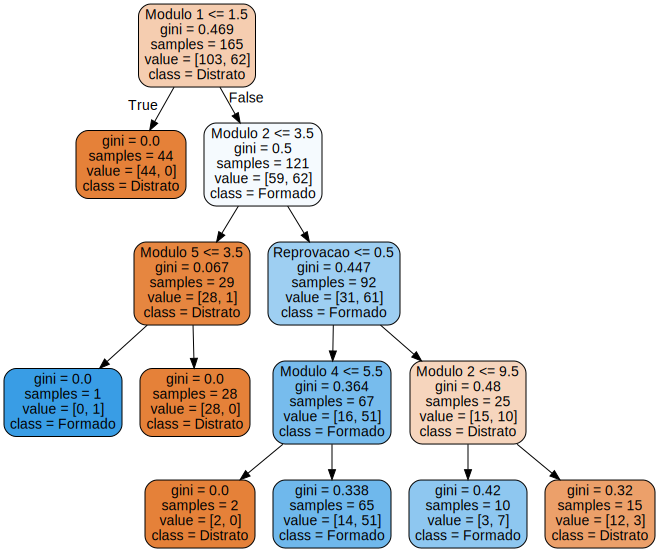

In [31]:
features = X.columns                                              # utiliza as colunas como referência
formato_graph = export_graphviz(modelo_tree, out_file=None,       # extrai o formato bruto do gráfico que será lido pelo graphviz
                       filled = True, rounded= True,               # filled == Preencher
                       feature_names = features,                
                       class_names = ['Distrato', 'Formado'])     # atualiza nome da classificação na arvore
grafico = graphviz.Source(formato_graph)                          # após a configuração plota o gráfico
grafico

### Comentários

A princípio obter o resultado de 81.69% de acurácia com Decision Tree parece ser animador. Entretanto, depois de realizarmos a validação de Baseline com DummyClassifier verificou-se que esse resultado não é expressivo. O método Dummy não é capaz de realizar aprendizado de máquina, mas mantém a proporção dos dados para dar palpites, por esse motivo teve 81.69% de acerto. Isso significa que os dados não estão balanceados o suficiente. É necessário mais dados para o aprendizado. Através da visualização da Arvore de decisão também constatou-se que há indicação de formados mesmo com nota abaixo do esperado. Nesse caso, deve-se apurar se há falhas no processo acadêmico e corrigir os dados para que o algoritmo siga as regras de negócio da empresa. 

**Os próximos passos serão**:

1. Verificar possíveis desvios no registro de aprovação acadêmica;
2. Obter maiores dados para o algoritmo reconhecer diferentes caracteristicas;
3. Avaliar novos modelos de classificação e hiperparâmetros. 